In [ ]:
#%load_ext autoreload
#%autoreload 2
%matplotlib inline
%cd '../HOTS'

In [3]:
import os
import pickle
import datetime
from mix_Network import *

dataset = 'nmnist'
records_path = '../Records'
timestr = datetime.datetime.now().date().isoformat()
timestr = '2021-01-06'

%mkdir -p ../Records
%mkdir -p ../Records/EXP_03_NMNIST

homeo = True
sigma = 1
pooling = False
homeinv = False
jitter = False
tau = 5
nb_train = 500
nb_test = 100
krnlinit = 'rdn'
nblay = 3
nbclust = 8
filt = 2

In [4]:
def makehisto(filt, tau, krnlinit, nblay, nbclust, homeo, records_path, timestr, dataset, sigma, homeinv, jitter, nb_train, nb_test):
    if pooling:
        hotshom = poolingnetwork(krnlinit=krnlinit, filt=filt, tau=tau, nblay=nblay, nbclust=nbclust, homeo=homeo, sigma=sigma, homeinv=homeinv, jitter=jitter)
    else:
        hotshom = network(krnlinit=krnlinit, filt=filt, tau=tau, nblay=nblay, nbclust=nbclust, homeo=homeo, sigma=sigma, homeinv=homeinv, jitter=jitter)
    arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
    fname = f'{records_path}/EXP_03_NMNIST/{timestr}_hots_{dataset}_{arch}_{krnlinit}_{tau}_{homeo}_{sigma}_{homeinv}_{jitter}'
    print(fname)
    if not os.path.isfile(fname+'_model.pkl'):
        loaderhom, order = hotshom.learningall(dataset=dataset)
        with open(fname+'_model.pkl', 'wb') as file:
            pickle.dump([hotshom, loaderhom, order], file, pickle.HIGHEST_PROTOCOL)
    else:
        with open(fname+'_model.pkl', 'rb') as file:
            hotshom, loaderhom, order = pickle.load(file)
    hotshom.plotlayer()
    if not os.path.isfile(fname+f'_histo_{nb_train}_{nb_test}.pkl'):       
        trainmaphom, loaderhom, _ = hotshom.running(loaderhom, order, nb_digit = nb_train)
        testmaphom, loaderhom, _ = hotshom.running(loaderhom, order, nb_digit = nb_test)
        with open(fname+f'_histo_{nb_train}_{nb_test}.pkl', 'wb') as file:
            pickle.dump([trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
    else:
        with open(fname+f'_histo_{nb_train}_{nb_test}.pkl', 'rb') as file:
            trainmaphom, testmaphom = pickle.load(file)
    histoscore(trainmaphom,testmaphom)
    return hotshom, loaderhom, order, trainmaphom, testmaphom

../Records/EXP_03_NMNIST/2021-01-06_hots_nmnist_[8, 16, 32]_rdn_5_True_1_False_False


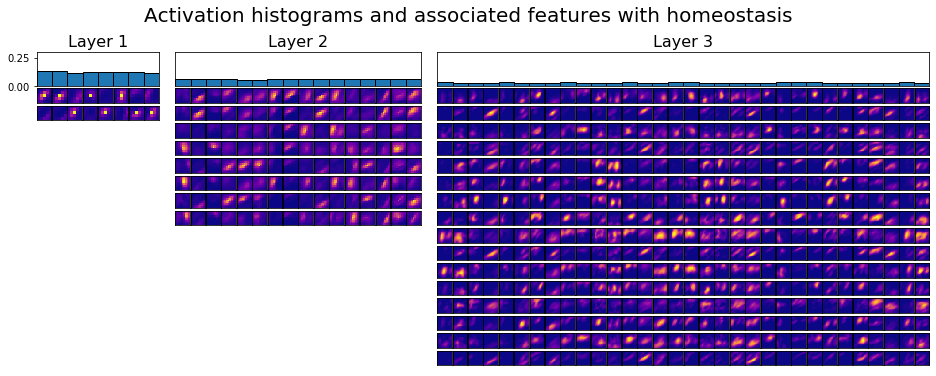


-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 86.0% - eucli = 85.0% - norm = 86.0%
Classification scores with kNN: 3-NN = 85.0% - 6-NN = 85.0%
Classification scores with entropy: Kullback-Leibler = 87.0% - Jensen-Shannon = 86.0%
----------------------------------------------------------------------------------------------------


In [4]:
makehisto(filt, tau, krnlinit, nblay, nbclust, homeo, records_path, timestr, dataset, sigma, homeinv, jitter, nb_train, nb_test);

../Records/EXP_03_NMNIST/2021-01-06_hots_nmnist_[8, 16, 32]_first_5_True_1_False_False


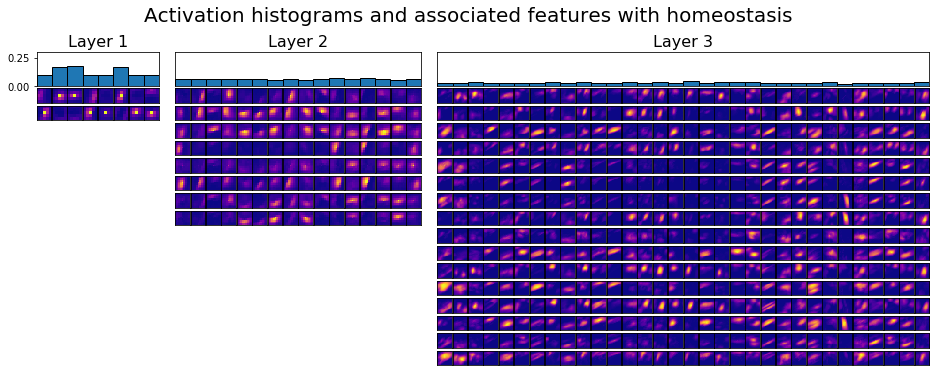

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 83.0% - eucli = 80.0% - norm = 81.0%
Classification scores with kNN: 3-NN = 81.0% - 6-NN = 82.0%
Classification scores with entropy: Kullback-Leibler = 83.0% - Jensen-Shannon = 83.0%
----------------------------------------------------------------------------------------------------


In [4]:
krnlinit = 'first'
makehisto(filt, tau, krnlinit, nblay, nbclust, homeo, records_path, timestr, dataset, sigma, homeinv, jitter, nb_train, nb_test);

../Records/EXP_03_NMNIST/2021-01-06_hots_nmnist_[8, 16, 32]_rdn_5_True_1_False_True


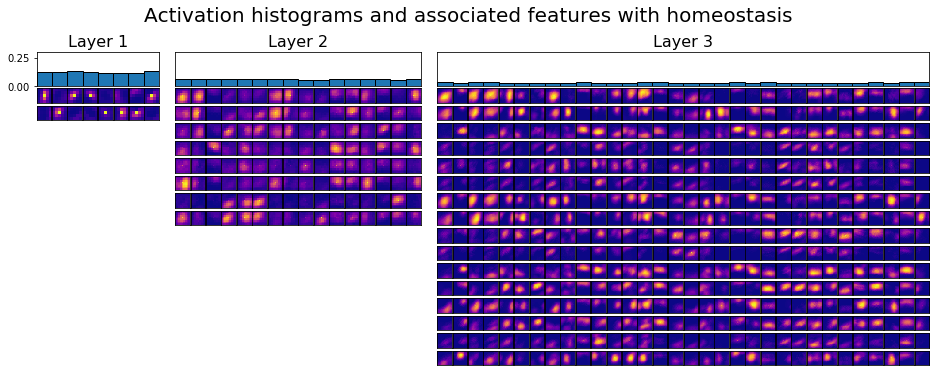

In [ ]:
krnlinit = 'rdn'
jitter = True
makehisto(filt, tau, krnlinit, nblay, nbclust, homeo, records_path, timestr, dataset, sigma, homeinv, jitter, nb_train, nb_test);

In [ ]:
nbtrain = 2000
makehisto(filt, tau, krnlinit, nblay, nbclust, homeo, records_path, timestr, dataset, sigma, homeinv, jitter, nb_train, nb_test);

In [ ]:
jitter = False
makehisto(filt, tau, krnlinit, nblay, nbclust, homeo, records_path, timestr, dataset, sigma, homeinv, jitter, nb_train, nb_test);